In [1]:
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import os
import dvv_module
from obspy import UTCDateTime
import scipy

2017-11-22 00:00:00, 2021-07-31 00:00:00

In [2]:
t = [] 
t0 = datetime.strptime("2017-11-22 00:00:00", "%Y-%m-%d %H:%M:%S")
t1 = datetime.strptime("2021-07-31 00:00:00", "%Y-%m-%d %H:%M:%S")
t.append(t0)
t.append(t1)
print(t)

[datetime.datetime(2017, 11, 22, 0, 0), datetime.datetime(2021, 7, 31, 0, 0)]


In [3]:
DEM = pd.read_csv("/home/users/h/henrymi2/jupyecke/meteoswiss/raw_data/order_118146_data.txt", sep=';')
FAH = pd.read_csv("/home/users/h/henrymi2/jupyecke/meteoswiss/raw_data/order_118147_data.txt", sep=';')
BAS = pd.read_csv("/home/users/h/henrymi2/jupyecke/meteoswiss/raw_data/order_118148_data.txt", sep=';')
DEM.time = pd.to_datetime(DEM.time, format='%Y%m%d')
FAH.time = pd.to_datetime(FAH.time, format='%Y%m%d')
BAS.time = pd.to_datetime(BAS.time, format='%Y%m%d')

In [4]:
def count_stations(station_name, station_object):
    count = 0
    for i in range(len(station_object.stn[:])):
        if station_object.stn[:][i] != station_name:
            print("Error")
        else:
            count += 1
    print(len(station_object.stn[:]), count)

# Example usage:
count_stations("DEM", DEM)
count_stations("FAH", FAH)
count_stations("BAS", BAS)

2526 2526
2557 2557
2465 2465


# DEM

https://swharden.com/blog/2020-09-23-signal-filtering-in-python/https://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77e

https://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77ehttps://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77e

https://towardsdatascience.com/time-series-analysis-resampling-shifting-and-rolling-f5664ddef77e

In [5]:
DEM = pd.read_csv("/home/users/h/henrymi2/jupyecke/meteoswiss/raw_data/order_118146_data.txt", sep=';')
print(DEM.shape)
DEM.time = pd.to_datetime(DEM.time, format='%Y%m%d')
DEM = DEM.drop(DEM[DEM['rka150d0'] == '-'].index)
DEM = DEM.drop(DEM[DEM['prestad0'] == '-'].index)
DEM = DEM.drop(DEM[DEM['tre005d0'] == '-'].index)
DEM.rka150d0 = pd.to_numeric(DEM.rka150d0)
DEM.prestad0 = pd.to_numeric(DEM.prestad0)
DEM.tre005d0 = pd.to_numeric(DEM.tre005d0)
print(DEM.shape)

(2526, 5)
(2521, 5)


In [6]:
DEM

,stn,time,prestad0,tre005d0,rka150d0
0,DEM,2017-01-01,971.1,-6.4,0.0
1,DEM,2017-01-02,970.6,-3.3,2.2
2,DEM,2017-01-03,974.7,-6.6,0.0
3,DEM,2017-01-04,969.8,-2.4,0.8
4,DEM,2017-01-05,974.7,-3.9,1.2
...,...,...,...,...,...
2521,DEM,2023-11-27,954.3,1.6,4.6
2522,DEM,2023-11-28,952.2,1.8,7.7
2523,DEM,2023-11-29,955.8,-1.0,0.0
2524,DEM,2023-11-30,948.6,0.0,26.7


## Daily mean Precipitation; daily total 0 UTC - 0 UTC [rka150d0]

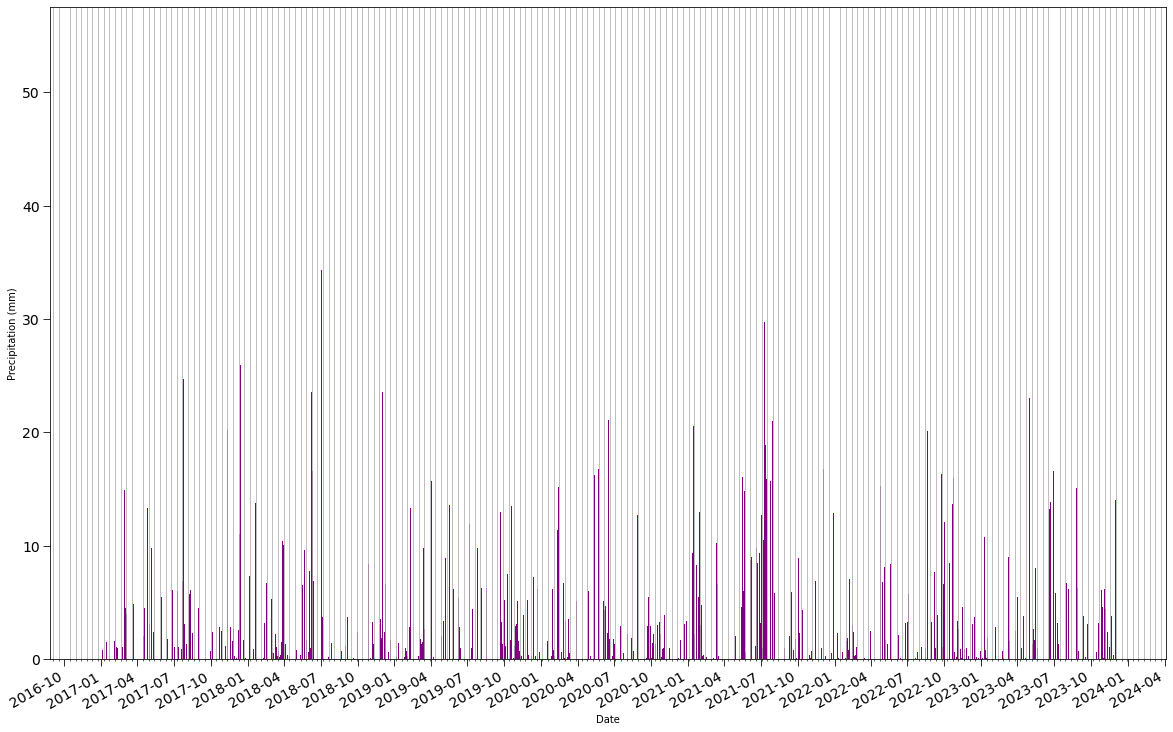

In [7]:
fig, ax = plt.subplots(figsize=(20, 12))

# Add x-axis and y-axis
ax.bar(DEM.time.values,
       DEM['rka150d0'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (mm)")

major_month = mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(major_month)
ax.tick_params(which='major', labelsize='14', length=7)
fmt_month = mdates.DayLocator(interval=14)
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.grid(True, which='minor')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()


In [10]:
def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

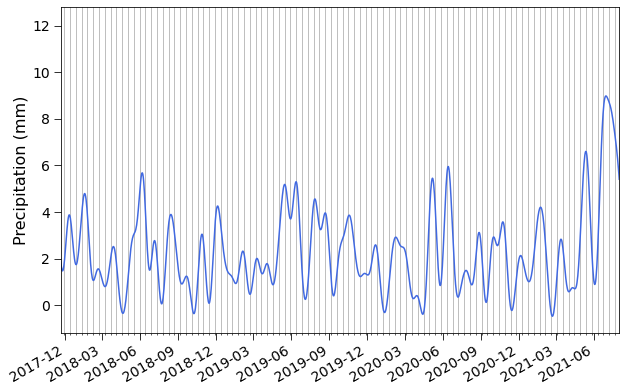

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

cutoff_freq = 30
sample_rate = 1/86400
precipitation_filtered = lowpass(DEM['rka150d0'], (1 / (24 * 3600 * cutoff_freq)), sample_rate)
precipitation_bar, = ax.plot(DEM.time.values,
                            precipitation_filtered,
                            color='#4169E1',
                            label='Precip.')
ax.set_ylabel("Precipitation (mm)", size=16)

# # Plot temperature data with label
# ax2 = ax.twinx()
# temperature_line, = ax2.plot(DEM.time, tre005d0_f1, color="#CD5334", label="Temp.")
# ax2.set_ylabel("Temperature (°C)", size=16)

# Combine legends with adjusted font size
# lines = [precipitation_bar]
# labels = [line.get_label() for line in lines]
# ax.legend(lines, labels, loc='upper right', fontsize=16, bbox_to_anchor=(1 - 0.3/fig.get_figwidth(), 1))

major_month = mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(major_month)
ax.tick_params(which='major', labelsize='14', length=7)
fmt_month = mdates.DayLocator(interval=14)
ax.xaxis.set_minor_locator(fmt_month)
ax.xaxis.grid(True, which='minor')
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_xlim([t[0], t[-1]])

plt.savefig("plots/temp_preci_30days_filtered.png", dpi=300)
plt.show()

## Daily mean Air temperature at 5 cm above grass [tre005d0]

In [ ]:
def plot_filtered(time, data, sample_rate, cutoff_frequencies, figsize):
    fig, axes = plt.subplots(1, len(cutoff_frequencies) + 1, figsize=figsize, sharex=True)

    axes[0].plot(time, data)
    axes[0].set_title("Original Signal")

    for ax, cutoff_freq in zip(axes[1:], cutoff_frequencies):
        filtered = lowpass(data, (1 / (24 * 3600 * cutoff_freq)), sample_rate)
        ax.plot(time, filtered)
        ax.set_title(f"Low Filter (cutoff: {cutoff_freq} days)")

    plt.tight_layout()
    plt.show()

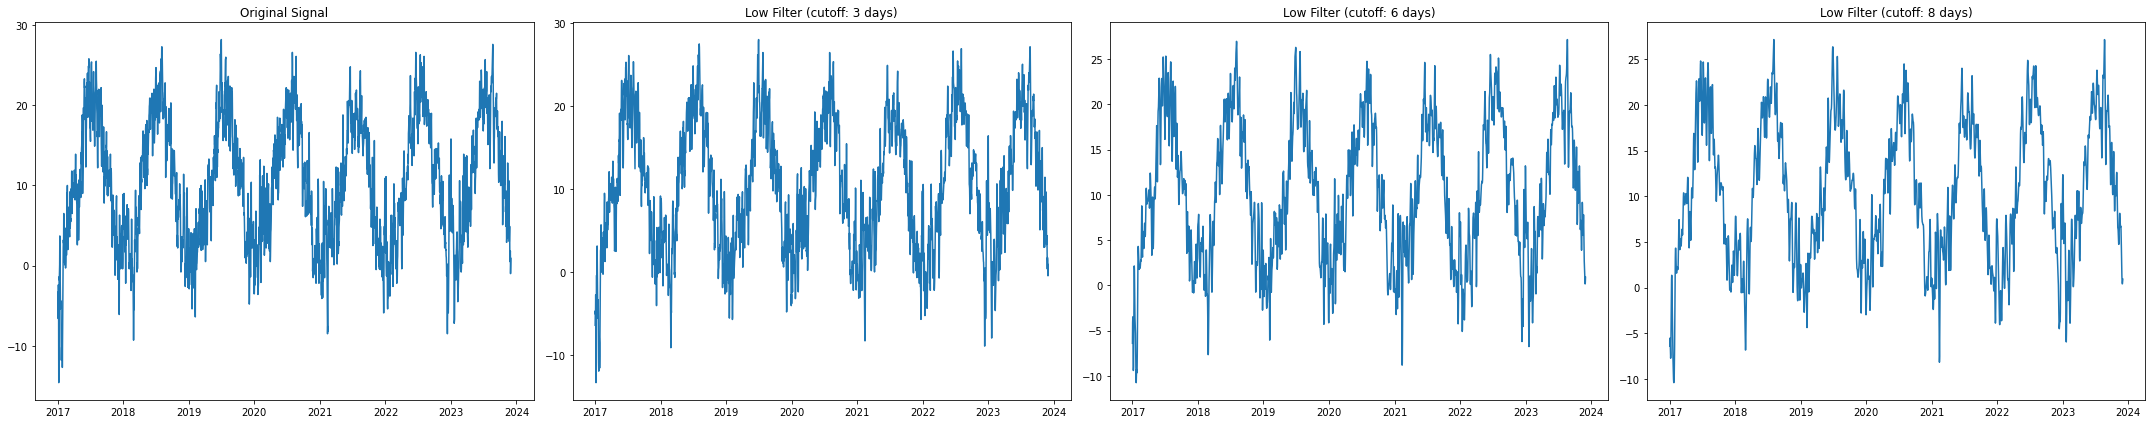

In [21]:
cutoff_frequencies = [3, 6, 8]
sample_rate = 1/86400
plot_filtered(DEM.time, DEM.tre005d0,  sample_rate, cutoff_frequencies, figsize=(30, 6))

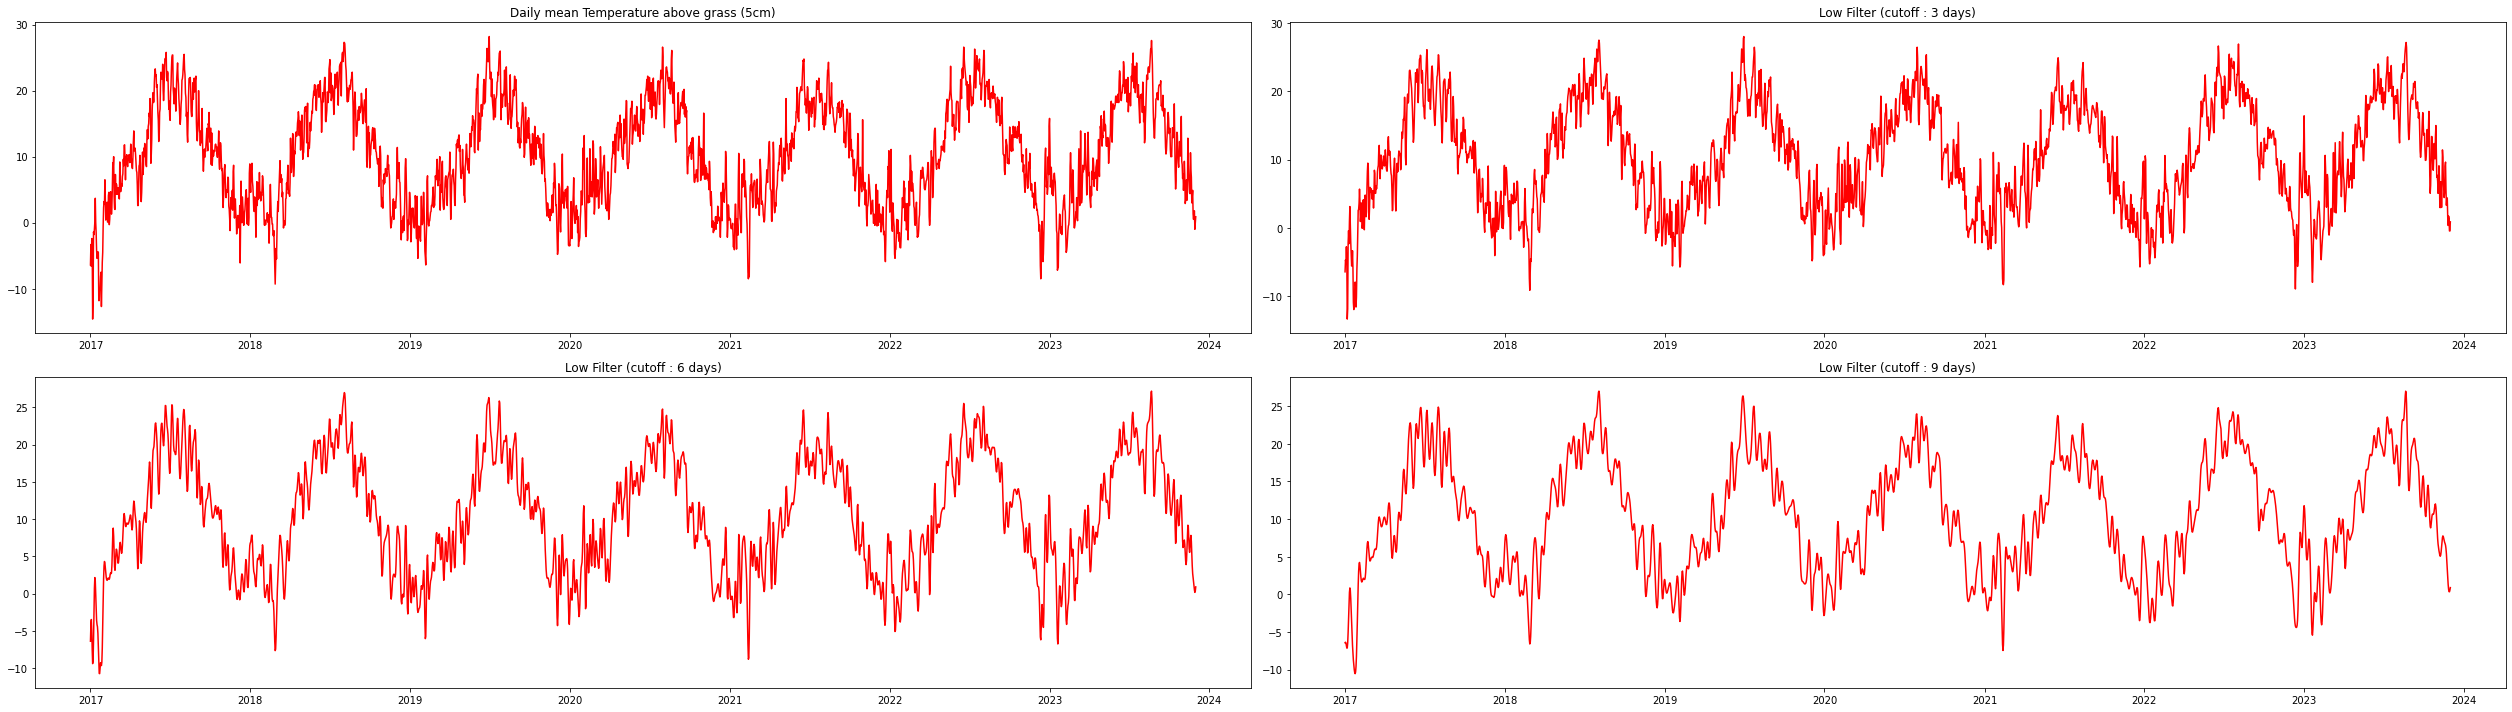

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(35, 10))

ax1.plot(DEM.time, DEM.tre005d0, color="r")
ax1.set_title("Daily mean Temperature above grass (5cm)")

n1 = 3
tre005d0_f1 = lowpass(DEM.tre005d0, (1/(24*3600*n1)), sample_rate)
ax2.plot(DEM.time, tre005d0_f1, color="r")
ax2.set_title(f"Low Filter (cutoff : {n1} days)")

n2 = 6
tre005d0_f2 = lowpass(DEM.tre005d0, (1/(24*3600*n2)), sample_rate)
ax3.plot(DEM.time, tre005d0_f2, color="r")
ax3.set_title(f"Low Filter (cutoff : {n2} days)")

n3 = 9
tre005d0_f3 = lowpass(DEM.tre005d0, (1/(24*3600*n3)), sample_rate)
ax4.plot(DEM.time, tre005d0_f3, color="r")
ax4.set_title(f"Low Filter (cutoff : {n3} days)")


# ax9.bar(DEM.time.values,
#        DEM['rka150d0'],
#        color='purple')
# ax9.set(xlabel="Date",
#        ylabel="Precipitation (mm)")

# major_month = mdates.MonthLocator(interval=3)
# ax9.xaxis.set_major_locator(major_month)
# ax9.tick_params(which='major', labelsize='14', length=7)
# fmt_month = mdates.DayLocator(interval=14)
# ax9.xaxis.set_minor_locator(fmt_month)
# ax9.xaxis.grid(True, which='minor')
# plt.setp(ax9.get_xticklabels(), rotation=30, ha='right')

# plt.savefig("plots/DEM_overall.png", dpi=1000, bbox_inches='tight')
plt.tight_layout()
plt.show()

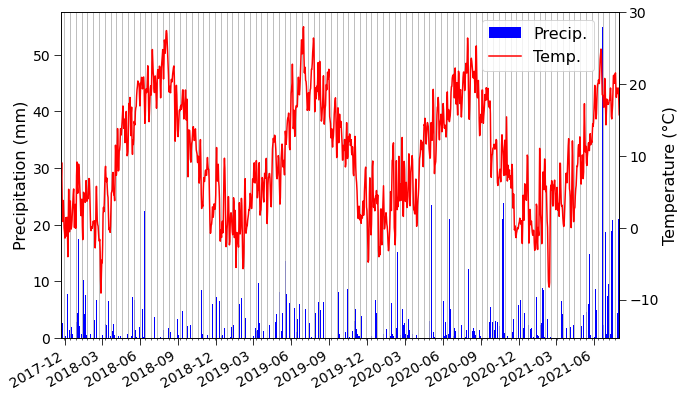

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precipitation data with label
precipitation_bar = ax.bar(DEM.time.values,
                            DEM['rka150d0'],
                            color='blue',
                            label='Precip.')
ax.set_ylabel("Precipitation (mm)", size=16)

# Plot temperature data with label
ax2 = ax.twinx()
temperature_line, = ax2.plot(DEM.time, tre005d0_f1, color="red", label="Temp.")
ax2.set_ylabel("Temperature (°C)", size=16)

# Combine legends with adjusted font size
lines = [precipitation_bar, temperature_line]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper right', fontsize=16, bbox_to_anchor=(1 - 0.3/fig.get_figwidth(), 1))

for axx in ax2, ax: 
    major_month = mdates.MonthLocator(interval=3)
    axx.xaxis.set_major_locator(major_month)
    axx.tick_params(which='major', labelsize='14', length=7)
    fmt_month = mdates.DayLocator(interval=14)
    axx.xaxis.set_minor_locator(fmt_month)
    axx.xaxis.grid(True, which='minor')
    plt.setp(axx.get_xticklabels(), rotation=30, ha='right')
    ax.set_xlim([t[0], t[-1]])

# for axx in axs[2], axs[3]: 
#                 ax1 = axx.twinx()
#                 ax1.get_yaxis().set_visible(False)
#                 ax2 = axx.twinx()
#                 ax2.get_yaxis().set_visible(False)
#                 ax3 = axx.twinx()
#                 ax3.get_yaxis().set_visible(False)
#                 lns1 = ax1.plot(DEM_time[365:-2*365-118], pre[365:-2*365-118], color="blue", label=f"Precipitation (mm)")
#                 lns2 = ax2.plot(DEM_time[365:-2*365-118], hpa[365:-2*365-118], color="green", label=f"Atmospheric pressure (hPa)")
#                 lns3 = ax3.plot(DEM_time[365:-2*365-118], temp[365:-2*365-118], color="orange", label=f"Air temperature (°C)")
#                 lns = lns1+lns2+lns3
#                 labs = [l.get_label() for l in lns]
#                 axx.legend(lns, labs, loc='upper left')
plt.savefig("plots/temp_preci.png", dpi=300)
plt.show()

## Atmospheric pressure at barometric altitude (QFE); daily mean [prestad0]

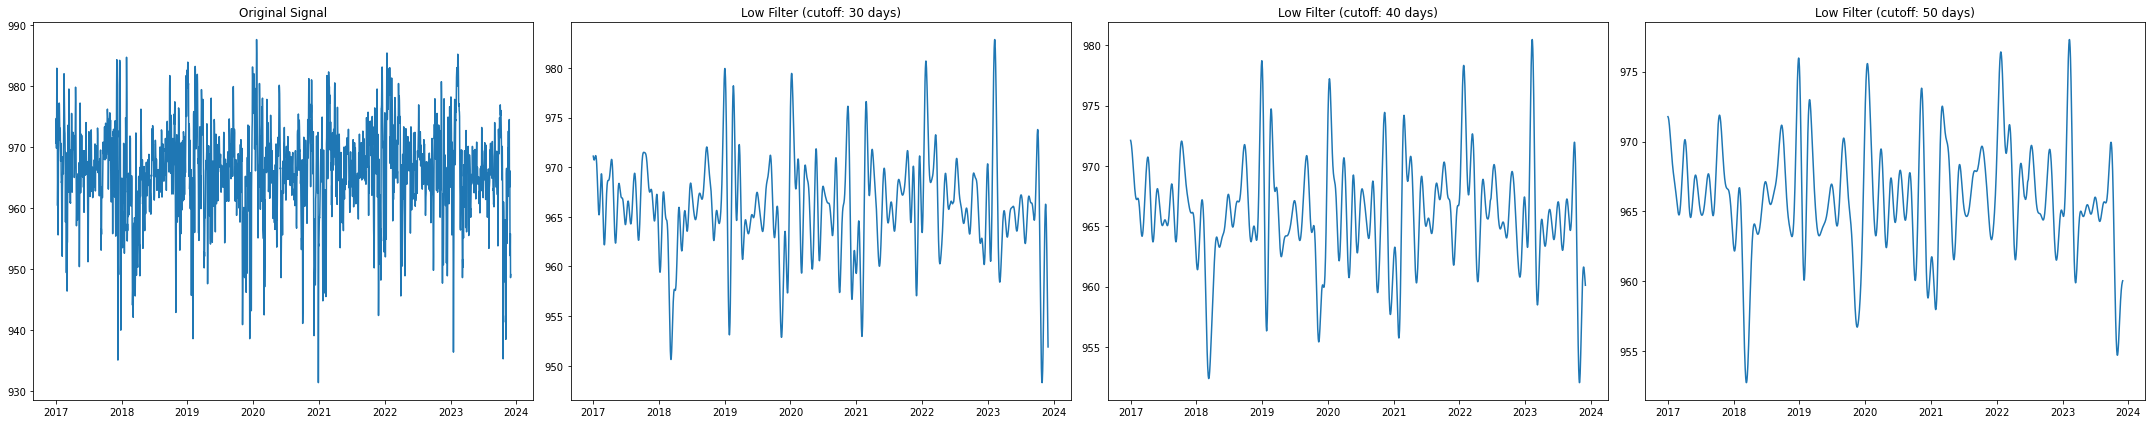

In [74]:
cutoff_frequencies = [30, 40, 50]
sample_rate = 1/86400
plot_filtered(DEM.time, DEM.prestad0,  sample_rate, cutoff_frequencies, figsize=(30, 6))

In [76]:
prestad0_filtered = lowpass(DEM['prestad0'], (1 / (24 * 3600 * 30)), sample_rate)

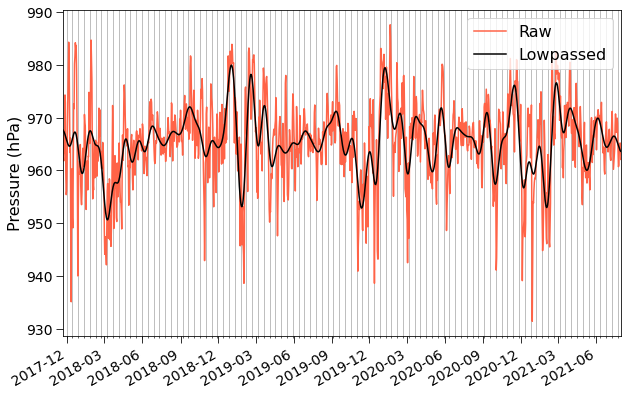

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precipitation data with label
raw_line, = ax.plot(DEM.time.values,
                    DEM['prestad0'],
                    color='tomato',
                    label='Raw')
ax.set_ylabel("Pressure (hPa)", size=16)

# Plot temperature data with label
filtered_line, = ax.plot(DEM.time, prestad0_filtered, color="black", label="Lowpassed")

# Combine legends with adjusted font size
lines = [raw_line, filtered_line]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper right', fontsize=16)

for axx in ax2, ax: 
    major_month = mdates.MonthLocator(interval=3)
    axx.xaxis.set_major_locator(major_month)
    axx.tick_params(which='major', labelsize='14', length=7)
    fmt_month = mdates.DayLocator(interval=14)
    axx.xaxis.set_minor_locator(fmt_month)
    axx.xaxis.grid(True, which='minor')
    plt.setp(axx.get_xticklabels(), rotation=30, ha='right')
    ax.set_xlim([t[0], t[-1]])

# for axx in axs[2], axs[3]: 
#                 ax1 = axx.twinx()
#                 ax1.get_yaxis().set_visible(False)
#                 ax2 = axx.twinx()
#                 ax2.get_yaxis().set_visible(False)
#                 ax3 = axx.twinx()
#                 ax3.get_yaxis().set_visible(False)
#                 lns1 = ax1.plot(DEM_time[365:-2*365-118], pre[365:-2*365-118], color="blue", label=f"Precipitation (mm)")
#                 lns2 = ax2.plot(DEM_time[365:-2*365-118], hpa[365:-2*365-118], color="green", label=f"Atmospheric pressure (hPa)")
#                 lns3 = ax3.plot(DEM_time[365:-2*365-118], temp[365:-2*365-118], color="orange", label=f"Air temperature (°C)")
#                 lns = lns1+lns2+lns3
#                 labs = [l.get_label() for l in lns]
#                 axx.legend(lns, labs, loc='upper left')
plt.savefig("plots/pressure.png", dpi=300)
plt.show()

In [ ]:
n1 = 20

prestad0_f1 = lowpass(DEM['prestad0'], (1/(24*3600*n1)), sample_rate)

# Soil temperatire - FAH + BAS

In [11]:
FAH = pd.read_csv("/home/users/h/henrymi2/jupyecke/meteoswiss/raw_data/order_118147_data.txt", sep=';')
print(FAH.shape)
FAH.time = pd.to_datetime(FAH.time, format='%Y%m%d')
FAH = FAH.drop(FAH[FAH['tso010d0'] == '-'].index)
FAH = FAH.drop(FAH[FAH['tso020d0'] == '-'].index)
FAH = FAH.drop(FAH[FAH['tso005d0'] == '-'].index)
FAH.tso010d0 = pd.to_numeric(FAH.tso010d0)
FAH.tso005d0 = pd.to_numeric(FAH.tso005d0)
FAH.tso020d0 = pd.to_numeric(FAH.tso020d0)
print(FAH.shape)

(2557, 5)
(2518, 5)


In [12]:
BAS = pd.read_csv("/home/users/h/henrymi2/jupyecke/meteoswiss/raw_data/order_118148_data.txt", sep=';')
print(BAS.shape)
BAS.time = pd.to_datetime(BAS.time, format='%Y%m%d')
BAS = BAS.drop(BAS[BAS['tso010d0'] == '-'].index)
BAS = BAS.drop(BAS[BAS['tso020d0'] == '-'].index)
BAS = BAS.drop(BAS[BAS['tso005d0'] == '-'].index)
BAS = BAS.dropna(subset=['tso020d0', 'tso005d0','tso010d0'])
BAS.tso010d0 = pd.to_numeric(BAS.tso010d0)
BAS.tso005d0 = pd.to_numeric(BAS.tso005d0)
BAS.tso020d0 = pd.to_numeric(BAS.tso020d0)
print(BAS.shape)

(2465, 5)
(2464, 5)


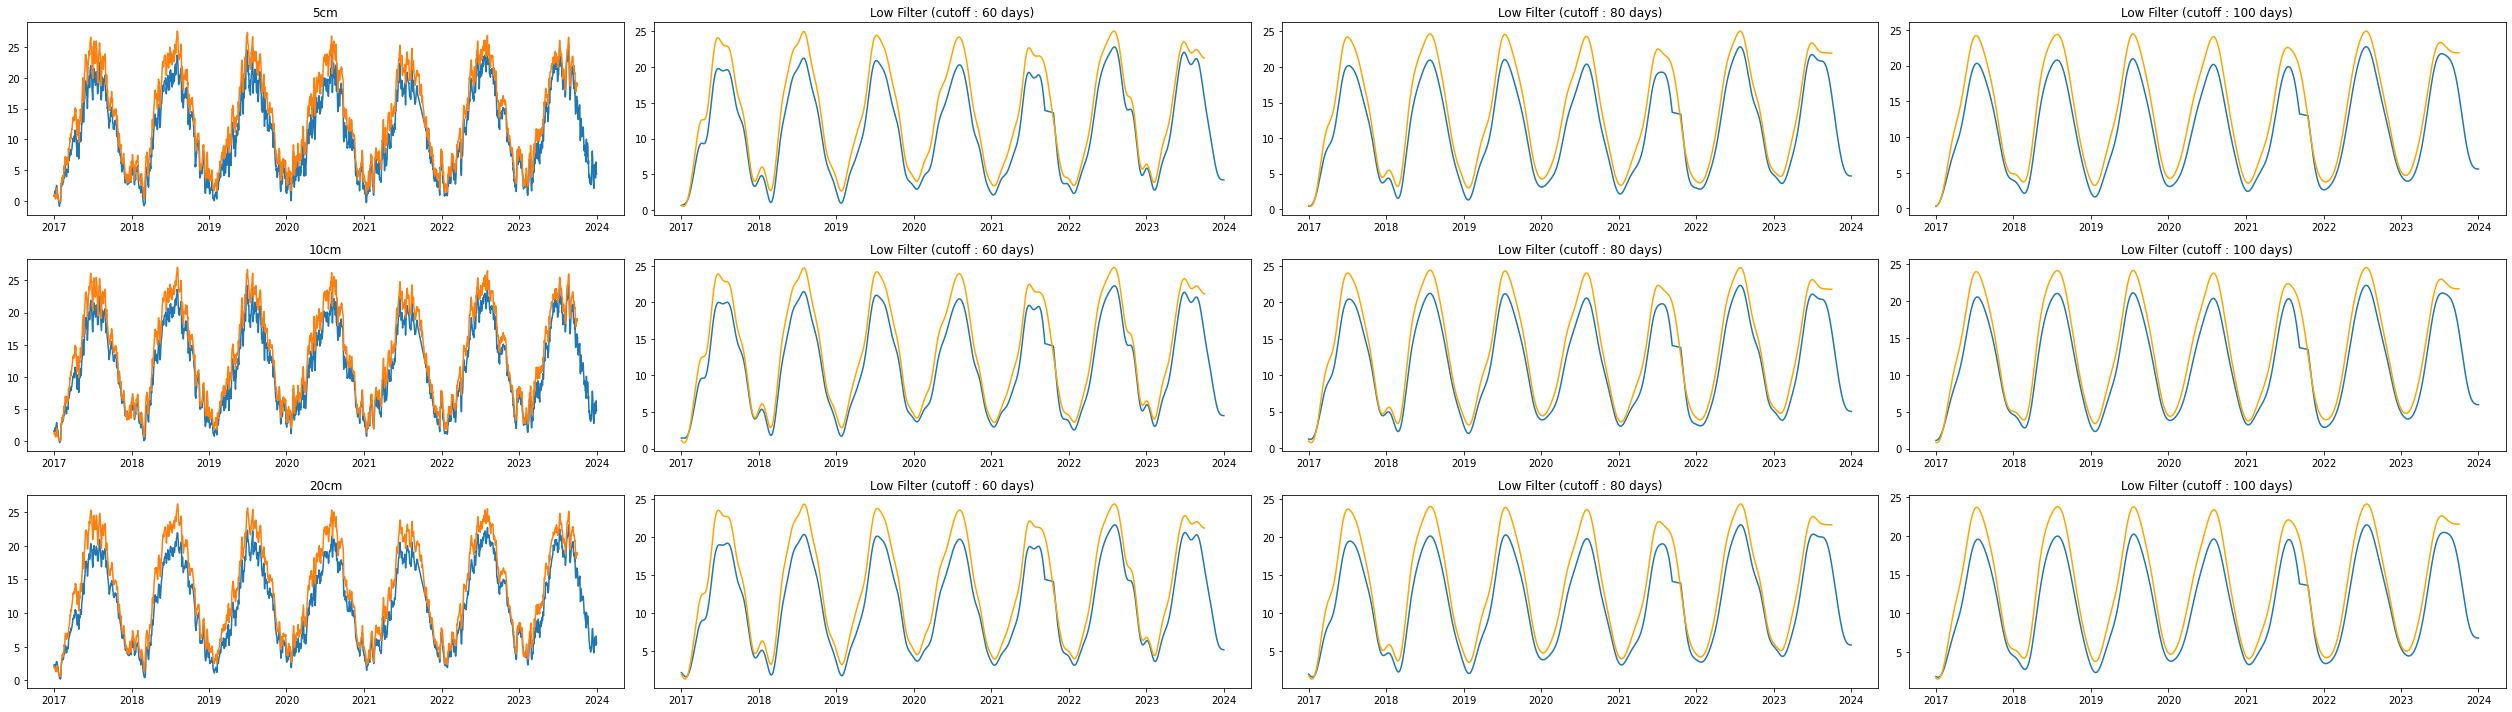

In [13]:
sample_rate = 1/86400

fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, figsize=(35, 10))
ax1.plot(FAH.time, FAH.tso005d0)
ax1.plot(BAS.time, BAS.tso005d0)
ax1.set_title("5cm")

n1 = 60
FAH_tso005d0_f1 = lowpass(FAH.tso005d0, (1/(24*3600*n1)), sample_rate)
BAS_tso005d0_f1 = lowpass(BAS.tso005d0, (1/(24*3600*n1)), sample_rate)
ax2.plot(FAH.time, FAH_tso005d0_f1)
ax2.plot(BAS.time, BAS_tso005d0_f1, color="orange")
ax2.set_title(f"Low Filter (cutoff : {n1} days)")

n2 = 80 
FAH_tso005d0_f2 = lowpass(FAH.tso005d0, (1/(24*3600*n2)), sample_rate)
BAS_tso005d0_f2 = lowpass(BAS.tso005d0, (1/(24*3600*n2)), sample_rate)
ax3.plot(FAH.time, FAH_tso005d0_f2)
ax3.plot(BAS.time, BAS_tso005d0_f2, color="orange")
ax3.set_title(f"Low Filter (cutoff : {n2} days)")

n3 = 100
FAH_tso005d0_f3 = lowpass(FAH.tso005d0, (1/(24*3600*n3)), sample_rate)
BAS_tso005d0_f3 = lowpass(BAS.tso005d0, (1/(24*3600*n3)), sample_rate)
ax4.plot(FAH.time, FAH_tso005d0_f3)
ax4.plot(BAS.time, BAS_tso005d0_f3, color="orange")
ax4.set_title(f"Low Filter (cutoff : {n3} days)")

ax5.plot(FAH.time, FAH.tso010d0)
ax5.plot(BAS.time, BAS.tso010d0)
ax5.set_title("10cm")

n1 = 60
FAH_tso010d0_f1 = lowpass(FAH.tso010d0, (1/(24*3600*n1)), sample_rate)
BAS_tso010d0_f1 = lowpass(BAS.tso010d0, (1/(24*3600*n1)), sample_rate)
ax6.plot(FAH.time, FAH_tso010d0_f1)
ax6.plot(BAS.time, BAS_tso010d0_f1, color="orange")
ax6.set_title(f"Low Filter (cutoff : {n1} days)")

n2 = 80 
FAH_tso010d0_f2 = lowpass(FAH.tso010d0, (1/(24*3600*n2)), sample_rate)
BAS_tso010d0_f2 = lowpass(BAS.tso010d0, (1/(24*3600*n2)), sample_rate)
ax7.plot(FAH.time, FAH_tso010d0_f2)
ax7.plot(BAS.time, BAS_tso010d0_f2, color="orange")
ax7.set_title(f"Low Filter (cutoff : {n2} days)")

n3 = 100
FAH_tso010d0_f3 = lowpass(FAH.tso010d0, (1/(24*3600*n3)), sample_rate)
BAS_tso010d0_f3 = lowpass(BAS.tso010d0, (1/(24*3600*n3)), sample_rate)
ax8.plot(FAH.time, FAH_tso010d0_f3)
ax8.plot(BAS.time, BAS_tso010d0_f3, color="orange")
ax8.set_title(f"Low Filter (cutoff : {n3} days)")

ax9.plot(FAH.time, FAH.tso020d0)
ax9.plot(BAS.time, BAS.tso020d0)
ax9.set_title("20cm")

n1 = 60
FAH_tso020d0_f1 = lowpass(FAH.tso020d0, (1/(24*3600*n1)), sample_rate)
BAS_tso020d0_f1 = lowpass(BAS.tso020d0, (1/(24*3600*n1)), sample_rate)
ax10.plot(FAH.time, FAH_tso020d0_f1)
ax10.plot(BAS.time, BAS_tso020d0_f1, color="orange")
ax10.set_title(f"Low Filter (cutoff : {n1} days)")

n2 = 80 
FAH_tso020d0_f2 = lowpass(FAH.tso020d0, (1/(24*3600*n2)), sample_rate)
BAS_tso020d0_f2 = lowpass(BAS.tso020d0, (1/(24*3600*n2)), sample_rate)
ax11.plot(FAH.time, FAH_tso020d0_f2)
ax11.plot(BAS.time, BAS_tso020d0_f2, color="orange")
ax11.set_title(f"Low Filter (cutoff : {n2} days)")

n3 = 100
FAH_tso020d0_f3 = lowpass(FAH.tso020d0, (1/(24*3600*n3)), sample_rate)
BAS_tso020d0_f3 = lowpass(BAS.tso020d0, (1/(24*3600*n3)), sample_rate)
ax12.plot(FAH.time, FAH_tso020d0_f3)
ax12.plot(BAS.time, BAS_tso020d0_f3, color="orange")
ax12.set_title(f"Low Filter (cutoff : {n3} days)")

plt.savefig("soil_temp.png", dpi=1000, bbox_inches='tight')
plt.tight_layout()
plt.show()

# Delemont Quelle

In [14]:
source = pd.read_csv("/home/users/h/henrymi2/jupyecke/meteoswiss/raw_data/delemont_quelle.csv", sep=';')

In [15]:
source = source.rename(columns={"Datum": "time", "Pegel [m]": "level", "Abfluss [l/min]": "discharge"})

In [16]:
source.time = pd.to_datetime(source.time, format='%d.%m.%Y')

In [17]:
source

,time,level,discharge
0,2014-01-01,0.20,2325.604
1,2014-01-02,0.20,2260.333
2,2014-01-03,0.20,2313.583
3,2014-01-04,0.20,2296.5
4,2014-01-05,0.20,2357.333
...,...,...,...
3587,2023-10-28,0.17,852.563
3588,2023-10-29,0.17,851.844
3589,2023-10-30,0.17,859.719
3590,2023-10-31,0.17,868.363


In [18]:
print(source.shape)
source = source.drop(source[source['level'] == '---'].index)
source = source.drop(source[source['discharge'] == ' ---'].index)
source['discharge'] = pd.to_numeric(source['discharge'])
source['level'] = pd.to_numeric(source['level'])
print(source.shape)

(3592, 3)
(3586, 3)


In [19]:
discharge = source['discharge']
level = source['level']

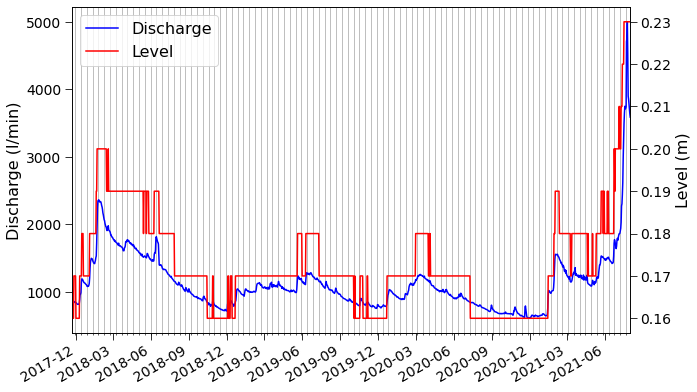

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

discharge_line, = ax.plot(source.time,
                          discharge,
                          color='blue',
                          label='Discharge')
ax.set_ylabel("Discharge (l/min)", size=16)

ax2 = ax.twinx()
level_line, = ax2.plot(source.time,
                       level,
                       color="red",
                       label='Level')
ax2.set_ylabel("Level (m)", size=16)

lines = [discharge_line, level_line]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper left', fontsize=16)

for axx in ax2, ax: 
    major_month = mdates.MonthLocator(interval=3)
    axx.xaxis.set_major_locator(major_month)
    axx.tick_params(which='major', labelsize='14', length=7)
    fmt_month = mdates.DayLocator(interval=14)
    axx.xaxis.set_minor_locator(fmt_month)
    axx.xaxis.grid(True, which='minor')
    plt.setp(axx.get_xticklabels(), rotation=30, ha='right')
    ax.set_xlim([t[0], t[-1]])


plt.savefig("plots/douxquelle.png", dpi=300)
plt.show()

# Saving

In [41]:
DEM

,stn,time,prestad0,tre005d0,rka150d0
0,DEM,2017-01-01,971.1,-6.4,0.0
1,DEM,2017-01-02,970.6,-3.3,2.2
2,DEM,2017-01-03,974.7,-6.6,0.0
3,DEM,2017-01-04,969.8,-2.4,0.8
4,DEM,2017-01-05,974.7,-3.9,1.2
...,...,...,...,...,...
2521,DEM,2023-11-27,954.3,1.6,4.6
2522,DEM,2023-11-28,952.2,1.8,7.7
2523,DEM,2023-11-29,955.8,-1.0,0.0
2524,DEM,2023-11-30,948.6,0.0,26.7


In [50]:
DEM_time = DEM['time'].to_numpy()
DEM_time = DEM['time'].to_numpy()
rka150d0 = DEM['rka150d0'].to_numpy()

In [51]:
np.savez('DEM', DEM_time=DEM_time, temp=tre005d0_f1, precip=rka150d0, precip_filt=)

In [52]:
DEM = np.load("DEM.npz")
k = []
for keys in DEM.files:
        print("Available key in NPZfile:", keys)
        k.append(keys)

Available key in NPZfile: DEM_time
Available key in NPZfile: temp
Available key in NPZfile: precip


In [53]:
DEM_time = DEM[k[0]]
temp = DEM[k[1]]
pre = DEM[k[2]]